<a href="https://colab.research.google.com/github/Devan5622/simplelinearregression/blob/master/LogisticRegressionCSVdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 
   
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv('Logistic.csv')

Saving Logistic.csv to Logistic.csv
User uploaded file "Logistic.csv" with length 10928 bytes


In [27]:
#Step 2: Get data

#x = np.arange(10).reshape(-1, 1) # x is 2d array
#y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
#print(x)
#print(y)
x = data[['Age','EstimatedSalary']].values
y = data['Purchased'].values
print(x)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [28]:
#Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear',C=10.0, random_state=0)
model.fit(x,y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#Step4: Get results
print('Model Classes', model.classes_)
print('intercept:', model.intercept_)
print('slope/coefficient:', model.coef_)
print(model.predict_proba(x))
print(model.predict(x))
print(model.score(x, y))
print(confusion_matrix(y, model.predict(x)))
print(classification_report(y, model.predict(x)))

Model Classes [0 1]
intercept: [-0.00510059]
slope/coefficient: [[-5.88797535e-03 -9.64200164e-09]]
[[0.52925538 0.47074462]
 [0.55264727 0.44735273]
 [0.53956773 0.46043227]
 [0.54106368 0.45893632]
 [0.5293923  0.4706077 ]
 [0.54106607 0.45893393]
 [0.54112832 0.45887168]
 [0.54858672 0.45141328]
 [0.53808065 0.46191935]
 [0.55275454 0.44724546]
 [0.53965636 0.46034364]
 [0.53958929 0.46041071]
 [0.53088296 0.46911704]
 [0.54827152 0.45172848]
 [0.52793956 0.47206044]
 [0.54404138 0.45595862]
 [0.57005523 0.42994477]
 [0.56716905 0.43283095]
 [0.56861863 0.43138137]
 [0.57150717 0.42849283]
 [0.56715958 0.43284042]
 [0.57011194 0.42988806]
 [0.5715355  0.4284645 ]
 [0.56715958 0.43284042]
 [0.56860681 0.43139319]
 [0.57004341 0.42995659]
 [0.57294609 0.42705391]
 [0.57006704 0.42993296]
 [0.54395288 0.45604712]
 [0.54681284 0.45318716]
 [0.54694664 0.45305336]
 [0.54125521 0.45874479]
 [0.53218104 0.46781896]
 [0.54249428 0.45750572]
 [0.54114269 0.45885731]
 [0.55266396 0.44733604]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


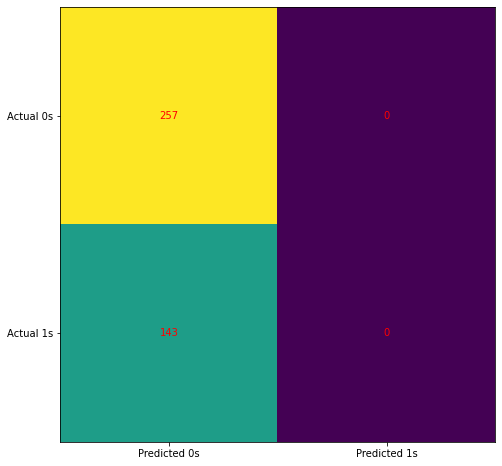

In [30]:
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()